In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
%matplotlib inline

In [26]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [27]:
data = w.wsd('000905.SH', 'close', '2010-01-01', '2019-03-25')

In [28]:
ind = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=['close'])

In [30]:
ind.index = pd.to_datetime(ind.index)

In [11]:
DATA_DIR = 'D:/Data/stocks/'

In [13]:
comp = pd.read_excel('D:/Data/index-component/000905.SH.xlsx')

In [14]:
comp.head()

,sec_name,wind_code
0,深振业A,000006.SZ
1,神州高铁,000008.SZ
2,中国宝安,000009.SZ
3,南玻A,000012.SZ
4,深科技,000021.SZ


In [15]:
dic = {}
for code in comp['wind_code']:
    fname = '%s/%s.xlsx'%(DATA_DIR, code)
    temp = pd.read_excel(fname)
    dic[code] = temp[['close', 'volume']]

In [16]:
pnl = pd.Panel(dic)

In [17]:
pnl.loc[:, :, 'ret'] = pnl.minor_xs('close').pct_change(20)

In [18]:
mask = pnl.minor_xs('ret').copy()

In [19]:
mask[mask > 0] = 1
mask[mask < 0] = 0

In [20]:
up = mask.sum(axis=1)
up_amt = (mask * pnl.minor_xs('volume').rolling(20).sum()).sum(axis=1)

In [21]:
mask = pnl.minor_xs('ret').copy()
mask[mask > 0] = 0
mask[mask < 0] = 1

In [22]:
down = mask.sum(axis=1)
down_amt = (mask * pnl.minor_xs('volume').rolling(20).sum()).sum(axis=1)

In [23]:
ratio = ((up+1) / (down+1)) / (up_amt / down_amt)

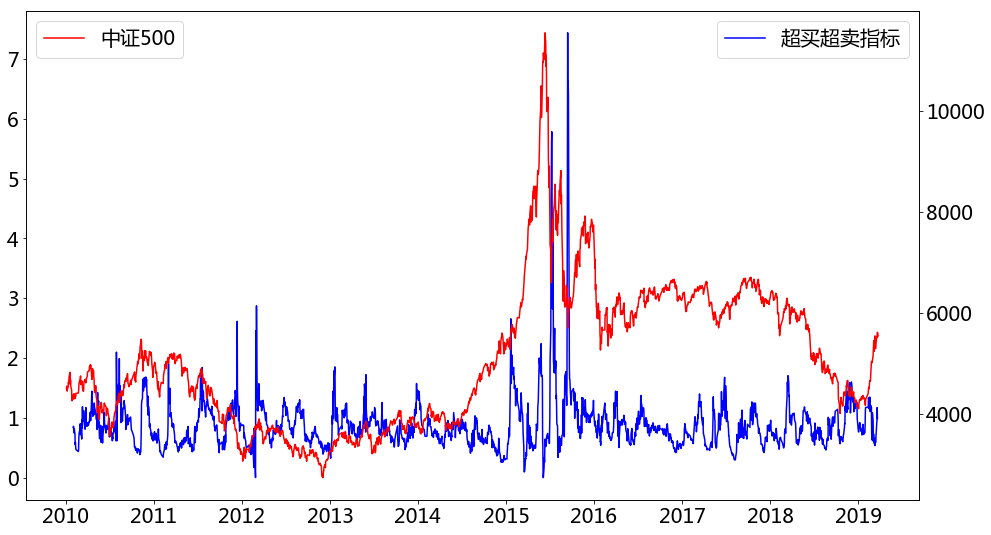

In [46]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(ratio, color='blue', label=u'超买超卖指标')
ax1.legend(fontsize=20)
ax2 = ax1.twinx()
ax2.plot(ind[ind.index >= '2010-01-01']['close'], color='red', label=u'中证500')
ax2.legend(fontsize=20, loc='upper left')
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)

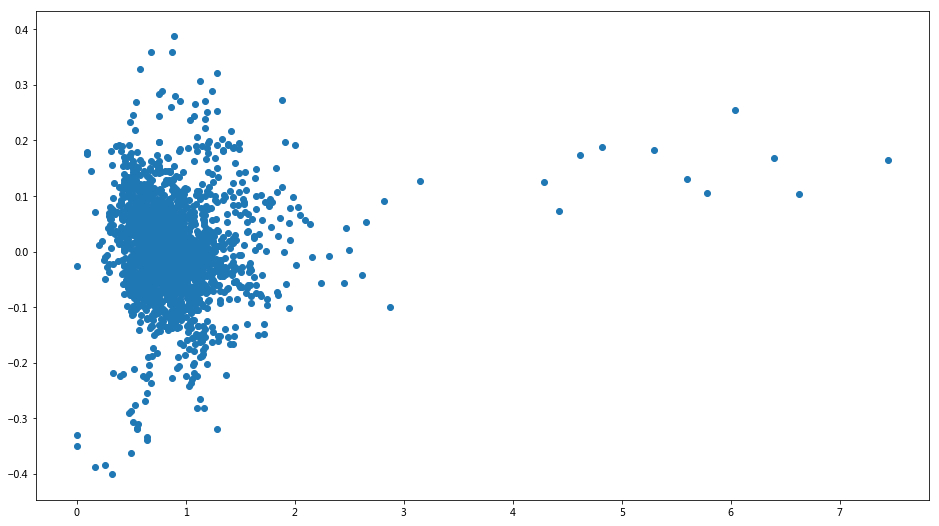

In [45]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(df['ratio'], df['close'].pct_change(20).shift(-20))

# 回测

In [32]:
df = pd.DataFrame(ind)

In [34]:
df['ratio'] = ratio

In [35]:
df['hold'] = 0
hold = False

In [36]:
up_threshold, down_threshold = 1.25, 0.8
hold = 0
for date in df.index:
    df.loc[date, 'hold'] = hold
    if hold == 0:
        if df.loc[date]['ratio'] > up_threshold:
            print date, "buy"
            hold = 1
    else:
        if df.loc[date]['ratio'] < down_threshold:
            print date, "sell"
            hold = 0

2010-04-19 00:00:00 buy
2010-05-20 00:00:00 sell
2010-07-30 00:00:00 buy
2010-08-02 00:00:00 sell
2010-08-03 00:00:00 buy
2010-10-08 00:00:00 sell
2010-11-12 00:00:00 buy
2010-12-20 00:00:00 sell
2011-03-02 00:00:00 buy
2011-03-28 00:00:00 sell
2011-07-12 00:00:00 buy
2011-09-13 00:00:00 sell
2011-11-23 00:00:00 buy
2011-12-23 00:00:00 sell
2012-02-28 00:00:00 buy
2012-04-19 00:00:00 sell
2012-06-25 00:00:00 buy
2012-07-23 00:00:00 sell
2012-08-28 00:00:00 buy
2012-09-18 00:00:00 sell
2013-01-14 00:00:00 buy
2013-02-05 00:00:00 sell
2013-05-22 00:00:00 buy
2013-05-29 00:00:00 sell
2013-05-30 00:00:00 buy
2013-07-24 00:00:00 sell
2013-08-05 00:00:00 buy
2013-08-12 00:00:00 sell
2013-12-25 00:00:00 buy
2014-01-27 00:00:00 sell
2015-01-19 00:00:00 buy
2015-03-13 00:00:00 sell
2015-05-15 00:00:00 buy
2015-06-02 00:00:00 sell
2015-07-03 00:00:00 buy
2015-08-04 00:00:00 sell
2015-08-27 00:00:00 buy
2015-08-28 00:00:00 sell
2015-09-02 00:00:00 buy
2015-10-29 00:00:00 sell
2015-11-12 00:00:00 

In [37]:
df['hold'].sum()

632

In [38]:
portfolio_ret = df['hold'] * df['close'].pct_change()

In [39]:
acc = (1 + portfolio_ret).cumprod()

Text(0.5,1,u'\u7ec4\u5408\u8868\u73b0')

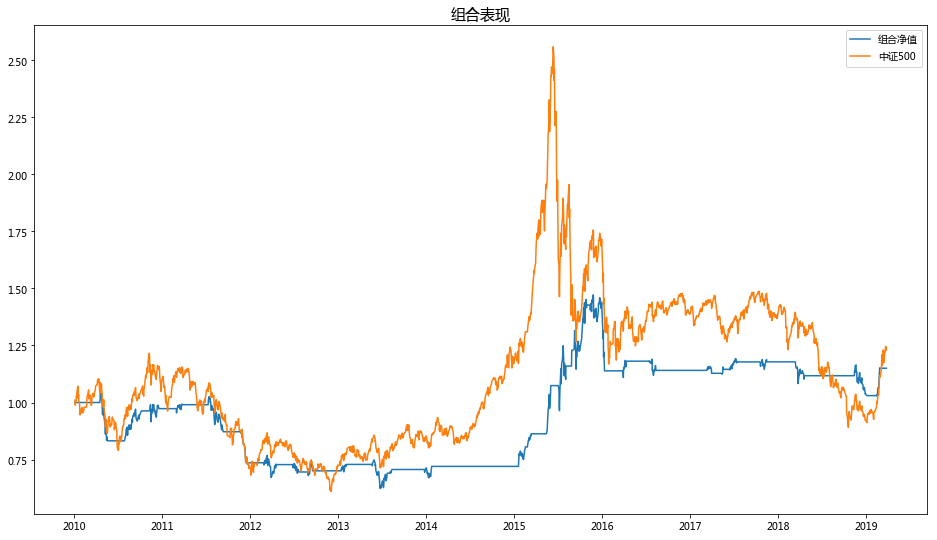

In [40]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(1, 1, 1)
ax.plot(acc, label=u'组合净值')
ax.plot((1 + df['close'].pct_change()).cumprod(), label=u'中证500')
ax.legend()
ax.set_title(u'组合表现', fontsize=15)